In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [5]:
dataset = pd.read_csv('C:/Users/Pavel/Lessen_jypyter/Housing.csv')

In [6]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
print(f'        Тип данных: \n{dataset.dtypes}')
print(f'        Наличие пропусков: \n{dataset.isna().sum()}')
print(f'        Наличие дубликатов: \n{dataset.duplicated().sum()}')

        Тип данных: 
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object
        Наличие пропусков: 
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
        Наличие дубликатов: 
0


<function matplotlib.pyplot.show(close=None, block=None)>

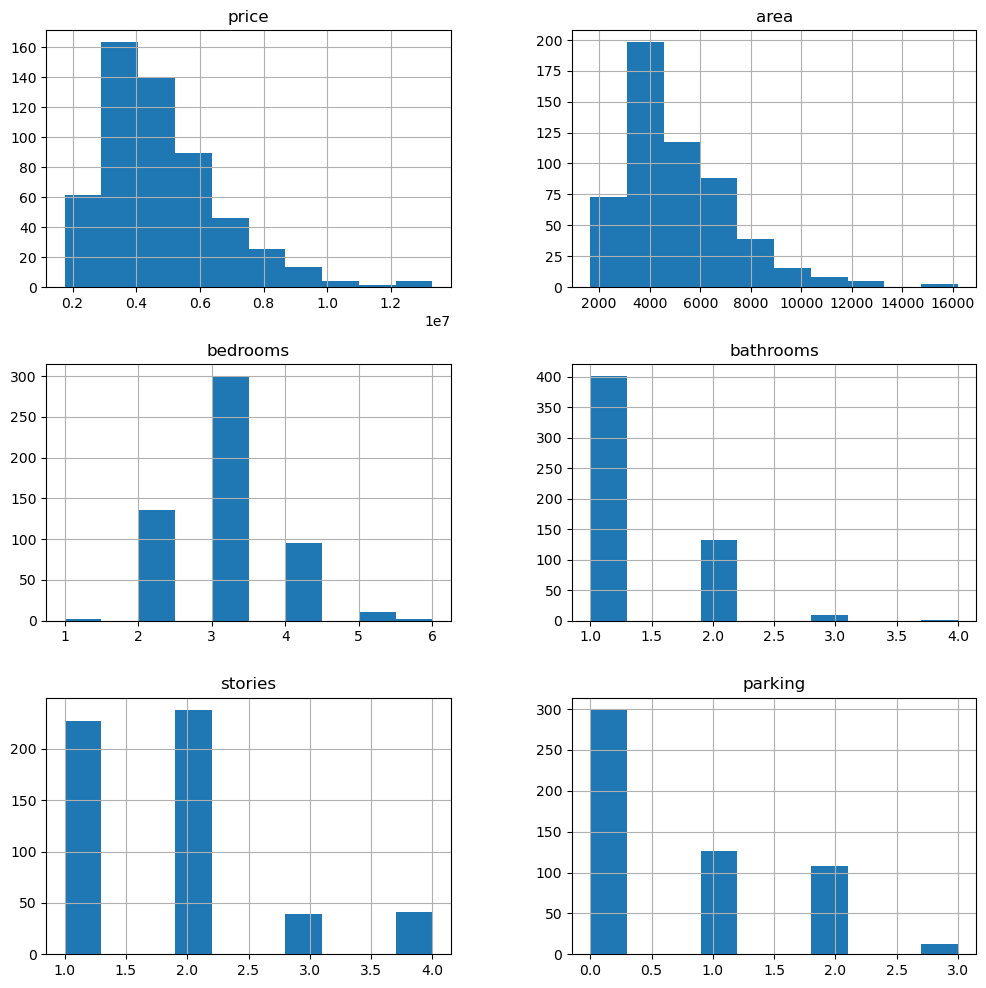

In [8]:
plt.rcParams['figure.figsize'] = [12, 12]
dataset.hist()
plt.show

In [9]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
dataset['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
dataset_i = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
for columns in dataset_i:
    label_encoder = LabelEncoder()
    dataset[columns] = label_encoder.fit_transform(dataset[columns])

In [13]:
furnishingstatus = pd.get_dummies(dataset['furnishingstatus']).astype(int)
dataset = pd.concat([dataset, furnishingstatus], axis = 1)
dataset = dataset.drop(['furnishingstatus'], axis = 1)

In [14]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,0,0


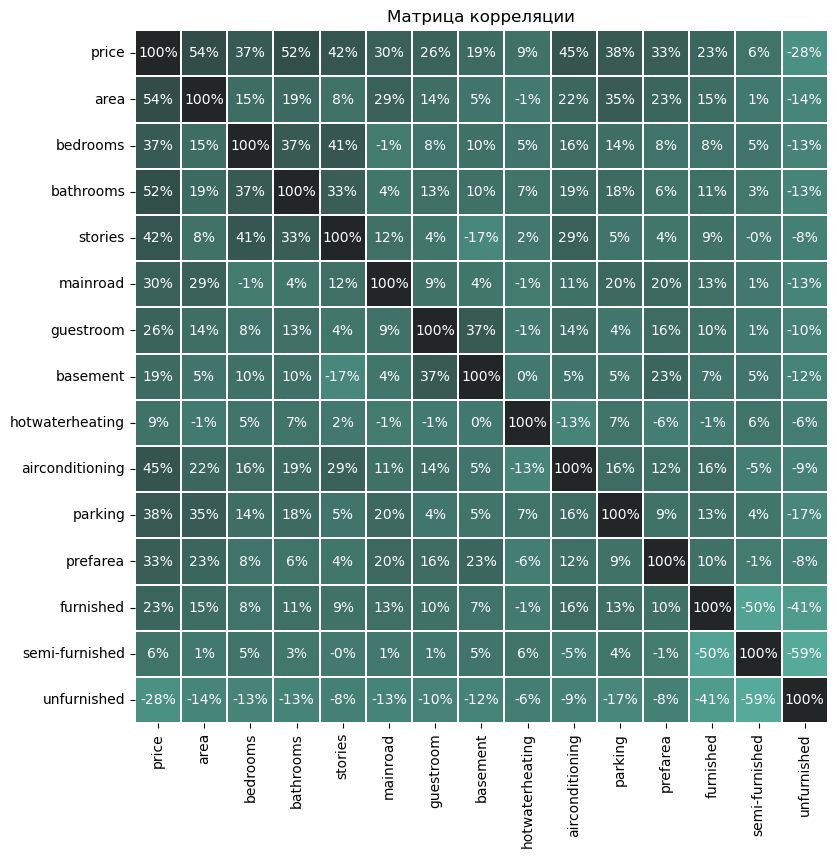

In [15]:
plt.figure(figsize = (9,9))
sns.heatmap(dataset.corr(),
            xticklabels = dataset.corr().columns,
            yticklabels = dataset.corr().columns,
            annot = True,
            fmt = '.0%',
            square = True,
            linewidth = 0.1,
            cmap = sns.color_palette("dark:#5A9_r", as_cmap=True),
            cbar = False
)
plt.title('Матрица корреляции')
plt.show()

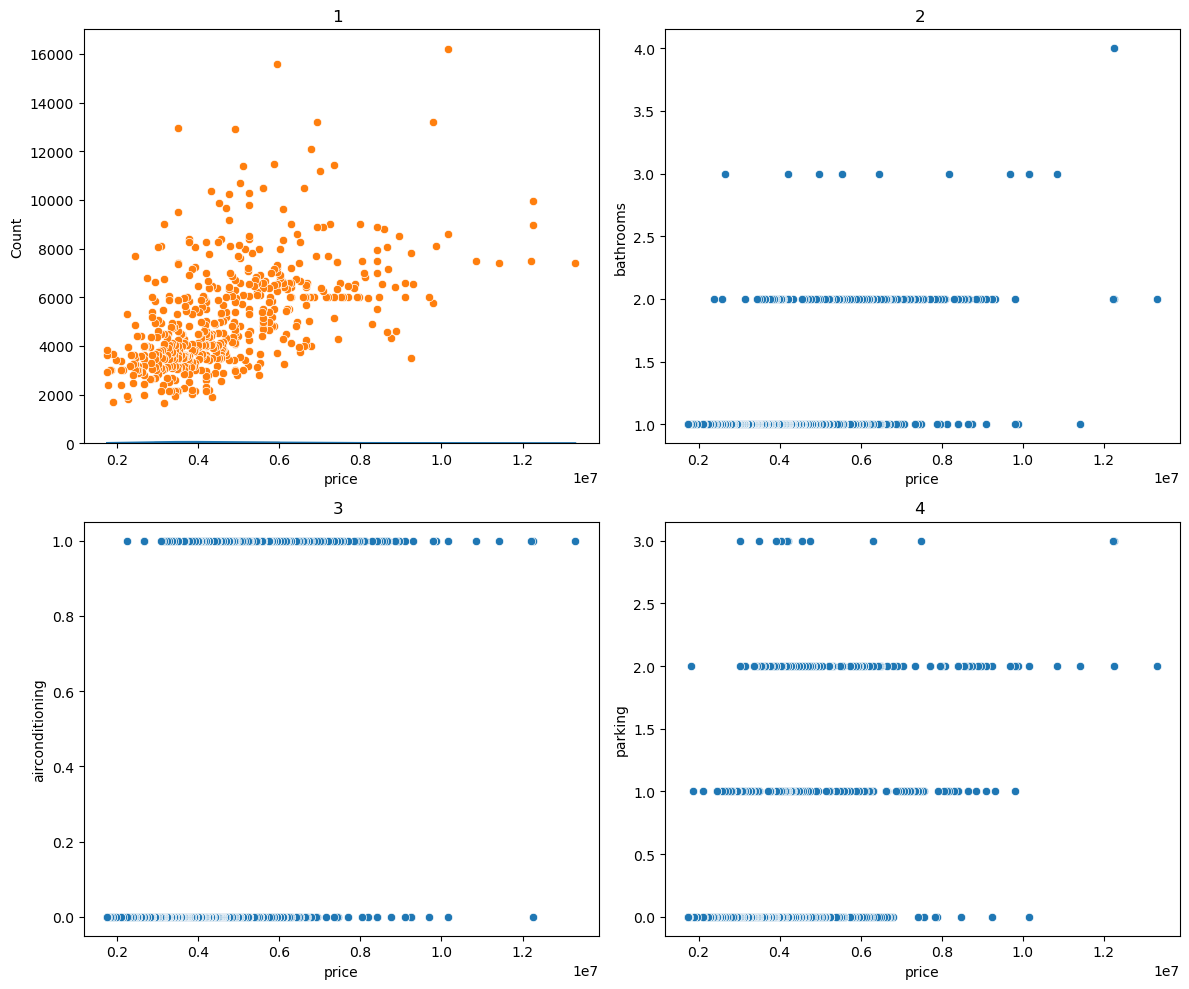

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data=dataset, x="price", kde=True, ax=axes[0,0], bins=30) 
axes[0,0].set_title("1 ")
sns.scatterplot(data=dataset, x="price", y="area", ax=axes[0,0])
axes[0,1].set_title("2 ")
sns.scatterplot(data=dataset, x="price", y="bathrooms", ax=axes[0,1])
axes[1,0].set_title("3 ")
sns.scatterplot(data=dataset, x="price", y="airconditioning", ax=axes[1,0])
axes[1,1].set_title("4 ")
sns.scatterplot(data=dataset, x="price", y="parking", ax=axes[1,1])
plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install catboost

In [ ]:
!pip install lightgbm

In [ ]:
!pip install XGBoost

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras import layers
from keras import Input
from keras.models import Sequential
from keras.layers import Flatten, Dense
import keras
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [35]:
from sklearn.metrics import r2_score

In [27]:
X = dataset.drop(columns=["price"])
y = dataset['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [170]:
r2_scores_list = []
model_names_list = []
scaler = StandardScaler()
train_scaler = scaler.fit_transform(X_train)
test_scaler = scaler.transform(X_test)

In [30]:
# -------- Random forest

In [154]:
random_forest = RandomForestRegressor(n_estimators=100,
                                      max_depth=6,
                                      random_state=42
                                     )
random_forest.fit(train_scaler, y_train)
random_forest_predict = random_forest.predict(test_scaler)

In [171]:
random_forest_train = random_forest.score(train_scaler, y_train)
random_forest_test = random_forest.score(test_scaler, y_test)
random_forest_r2_score = r2_score(y_test, random_forest_predict)
print(f'Оценка тренировочной модели : {random_forest_train}')
print(f'Оценка тестовой модели : {random_forest_test}')
print(f'R2 score : {random_forest_r2_score}')
r2_scores_list.append(random_forest_r2_score)
model_names_list.append('Случайный Лес')

Оценка тренировочной модели : 0.8585359198456949
Оценка тестовой модели : 0.5935071839643311
R2 score : 0.5935071839643311


In [ ]:
# -------Tree regressor

In [156]:
tree = DecisionTreeRegressor( max_depth=6,
                             random_state=42
                            )
tree.fit(train_scaler, y_train)
tree_predict = tree.predict(test_scaler)

In [172]:
tree_train = tree.score(train_scaler, y_train)
tree_test = tree.score(test_scaler, y_test)
tree_r2_score = r2_score(y_test, tree_predict)
print(f'Оценка тренировочной модели : {tree_train}')
print(f'Оценка тестовой модели : {tree_test}')
r2_scores_list.append(tree_r2_score)
model_names_list.append('Дерево решений')

Оценка тренировочной модели : 0.8263167096957358
Оценка тестовой модели : 0.45658010588104236


In [ ]:
# ---------keras

In [47]:
model = keras.Sequential([
    Input(shape=(14,)),
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1)
])

In [48]:
model.compile(optimizer = 'adam',
             loss = tf.keras.losses.MeanSquaredError(
                reduction="sum_over_batch_size"),
                metrics = ['r2_score']
             )

In [ ]:
model.fit(X, y, epochs=250, verbose=2)

In [54]:
model.evaluate(X, y, verbose = 2)

18/18 - 0s - 4ms/step - loss: 3333163057152.0000 - r2_score: 0.0455


[3333163057152.0, 0.045519232749938965]

In [ ]:
#------------ Catboost

In [158]:
catboost = CatBoostRegressor(n_estimators=100,
                             learning_rate=0.1,
                             max_depth=6,
                             random_state=42,
                             verbose=False
                            )
catboost.fit(train_scaler, y_train)
catboost_predict = catboost.predict(test_scaler)

In [173]:
catboost_score_train = catboost.score(train_scaler, y_train)
catboost_score_test = catboost.score(test_scaler,y_test)
catboost_r2_score = r2_score(y_test, catboost_predict)
print(f'Оценка тренировочной модели : {catboost_score_train}')
print(f'Оценка тестовой модели : {catboost_score_test}')
r2_scores_list.append(catboost_r2_score)
model_names_list.append('catboost')

Оценка тренировочной модели : 0.8767634446110119
Оценка тестовой модели : 0.6306803011031645


In [ ]:
#-----------lightgbm

In [60]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [160]:
lightgbm_model = LGBMRegressor(n_estimators=100,
                               learning_rate=0.1,
                               max_depth=6,
                               random_state=42
                              )
lightgbm_model.fit(train_scaler, y_train)
lightgbm_model_predict = lightgbm_model.predict(test_scaler)

In [174]:
lightgbm_model_score_train = lightgbm_model.score(train_scaler, y_train)
lightgbm_model_score_test = lightgbm_model.score(test_scaler,y_test)
lightgbm_model_r2_score = r2_score(y_test, lightgbm_model_predict)
print(f'Оценка тренировочной модели : {lightgbm_model_score_train}')
print(f'Оценка тестовой модели : {lightgbm_model_score_test}')
r2_scores_list.append(lightgbm_model_r2_score)
model_names_list.append('lightgbm_model')

Оценка тренировочной модели : 0.8372525473279919
Оценка тестовой модели : 0.6318633218786179


In [ ]:
#-------------xgb_model

In [162]:
xgb_model = XGBRegressor(n_estimators=100,
                         learning_rate=0.1,
                         max_depth=5,
                         random_state=42
                        )
xgb_model.fit(train_scaler, y_train)
xgb_model_predict = xgb_model.predict(test_scaler)

In [175]:
xgb_model_score_train = xgb_model.score(train_scaler, y_train, y_train)
xgb_model_score_test = xgb_model.score(test_scaler,y_test)
xgb_model_r2_score = r2_score(y_test, xgb_model_predict)
print(f'Оценка тренировочной модели : {xgb_model_score_train}')
print(f'Оценка тестовой модели : {xgb_model_score_test}')
r2_scores_list.append(xgb_model_r2_score)
model_names_list.append('xgb_model')

Оценка тренировочной модели : 0.9611618518829346
Оценка тестовой модели : 0.6412791013717651


In [ ]:
# Результат моделей

In [177]:
R2_score_results = pd.DataFrame({
    'Model': model_names_list,
    'R2 score': r2_scores_list,
    'R2 score (%)': [f"{a * 100:.2f}%" for a in r2_scores_list]
})


R2_score_results = R2_score_results.sort_values(by='R2 score', ascending=False)

print("\n--- Сводная Таблица Результатов ---")
print(R2_score_results.to_string(index=False))


--- Сводная Таблица Результатов ---
         Model  R2 score R2 score (%)
     xgb_model  0.641279       64.13%
lightgbm_model  0.631863       63.19%
      catboost  0.630680       63.07%
 Случайный Лес  0.593507       59.35%
Дерево решений  0.456580       45.66%
